In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyreadr
import os
import numpy as np

In [29]:
def load_rda(file_paths):

  dataframes = {}

  for file_path in file_paths:
      result = pyreadr.read_r(file_path)

      for key in result.keys():
          dataframes[key] = result[key]

  return dataframes

In [30]:
def missing_values(df):
  return(df.isnull().sum())

In [31]:
import pandas as pd

def outlier_values(df):
    outliers = pd.Series(dtype="float64")

    for col in df.select_dtypes(include=["number"]):  
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        mask = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
        outliers[col] = mask.mean() * 100  
    return outliers


In [32]:
def clean_data(data_dict):
    cleaned_dict = {}
    for key, df in data_dict.items():
        df_cleaned = df.drop_duplicates()
        if 'RecordBeg' in df_cleaned.columns:
            df_cleaned.loc[:, 'RecordBeg'] = pd.to_datetime(df_cleaned['RecordBeg'], errors='coerce')
        if 'RecordEnd' in df_cleaned.columns:
            df_cleaned.loc[:, 'RecordEnd'] = pd.to_datetime(df_cleaned['RecordEnd'], errors='coerce')

        cleaned_dict[key] = df_cleaned

    return cleaned_dict

## freMTPL

In [33]:
import os
import pandas as pd

# Charger les fichiers CSV
freMTPL1 = pd.read_csv("/home/onyxia/work/Federated_Learning_Milliman/raw_data/freMTPLfreq.csv")

# Vérifier si le dossier raw_data existe, sinon le créer
output_dir = "raw_data"
os.makedirs(output_dir, exist_ok=True)

# Sauvegarder la base fusionnée dans raw_data
output_path = os.path.join(output_dir, "freMTPL1.csv")
freMTPL1.to_csv(output_path, index=False)

print(f"Base fusionnée enregistrée sous : {output_path}")


Base fusionnée enregistrée sous : raw_data/freMTPL1.csv


In [34]:
import os
import pandas as pd

# Charger les fichiers CSV
freMTPL2 = pd.read_csv("/home/onyxia/work/Federated_Learning_Milliman/raw_data/freMTPL2freq.csv")
# Vérifier si le dossier raw_data existe, sinon le créer
output_dir = "raw_data"
os.makedirs(output_dir, exist_ok=True)

# Sauvegarder la base fusionnée dans raw_data
output_path = os.path.join(output_dir, "freMTPL2.csv")
freMTPL2.to_csv(output_path, index=False)

print(f"Base fusionnée enregistrée sous : {output_path}")


Base fusionnée enregistrée sous : raw_data/freMTPL2.csv


In [35]:
df_freMTPL1 = pd.read_csv("/home/onyxia/work/Federated_Learning_Milliman/brouillon/crespin/raw_data/freMTPL1.csv")
df_freMTPL2 = pd.read_csv("/home/onyxia/work/Federated_Learning_Milliman/brouillon/crespin/raw_data/freMTPL2.csv")
# Afficher les premières lignes
print(df_freMTPL1.head())
print(df_freMTPL2.head())


   PolicyID  ClaimNb  Exposure Power  CarAge  DriverAge  \
0         1        0      0.09     g       0         46   
1         2        0      0.84     g       0         46   
2         3        0      0.52     f       2         38   
3         4        0      0.45     f       2         38   
4         5        0      0.15     g       0         41   

                                Brand      Gas              Region  Density  
0  Japanese (except Nissan) or Korean   Diesel           Aquitaine       76  
1  Japanese (except Nissan) or Korean   Diesel           Aquitaine       76  
2  Japanese (except Nissan) or Korean  Regular  Nord-Pas-de-Calais     3003  
3  Japanese (except Nissan) or Korean  Regular  Nord-Pas-de-Calais     3003  
4  Japanese (except Nissan) or Korean   Diesel    Pays-de-la-Loire       60  
   IDpol  ClaimNb  Exposure  VehPower  VehAge  DrivAge  BonusMalus VehBrand  \
0    1.0        1      0.10         5       0       55          50      B12   
1    3.0        1  

In [36]:
print(df_freMTPL1.columns)
print(df_freMTPL2.columns)

Index(['PolicyID', 'ClaimNb', 'Exposure', 'Power', 'CarAge', 'DriverAge',
       'Brand', 'Gas', 'Region', 'Density'],
      dtype='object')
Index(['IDpol', 'ClaimNb', 'Exposure', 'VehPower', 'VehAge', 'DrivAge',
       'BonusMalus', 'VehBrand', 'VehGas', 'Area', 'Density', 'Region'],
      dtype='object')


In [37]:
# Renommer les colonnes pour df_freMTPL1
df_freMTPL1 = df_freMTPL1.rename(columns={
    "PolicyID": "IdPolicy",
    "Power": "power",
    "CarAge": "CarAge",
    "DriverAge": "DriverAge",
    "Brand": "CarBrand",
    "Gas": "CarGas"
})

# Renommer les colonnes pour df_freMTPL2
df_freMTPL2 = df_freMTPL2.rename(columns={
    "IDpol": "IdPolicy",
    "VehPower": "power",
    "VehAge": "CarAge",
    "DrivAge": "DriverAge",
    "VehBrand": "CarBrand",
    "VehGas": "CarGas"
})

# Supprimer les colonnes BonusMalus et Area de df_freMTPL2
df_freMTPL2 = df_freMTPL2.drop(columns=["BonusMalus", "Area"])

# Réorganiser les colonnes dans le même ordre
columns_order = ["IdPolicy", "ClaimNb", "Exposure", "power", "CarAge", 
                 "DriverAge", "CarBrand", "CarGas", "Region", "Density"]

df_freMTPL1 = df_freMTPL1[columns_order]
df_freMTPL2 = df_freMTPL2[columns_order]


In [38]:
df_freMTPL1

,IdPolicy,ClaimNb,Exposure,power,CarAge,DriverAge,CarBrand,CarGas,Region,Density
0,1,0,0.090000,g,0,46,Japanese (except Nissan) or Korean,Diesel,Aquitaine,76
1,2,0,0.840000,g,0,46,Japanese (except Nissan) or Korean,Diesel,Aquitaine,76
2,3,0,0.520000,f,2,38,Japanese (except Nissan) or Korean,Regular,Nord-Pas-de-Calais,3003
3,4,0,0.450000,f,2,38,Japanese (except Nissan) or Korean,Regular,Nord-Pas-de-Calais,3003
4,5,0,0.150000,g,0,41,Japanese (except Nissan) or Korean,Diesel,Pays-de-la-Loire,60
...,...,...,...,...,...,...,...,...,...,...
413164,413165,0,0.002740,j,0,29,Japanese (except Nissan) or Korean,Diesel,Ile-de-France,2471
413165,413166,0,0.005479,d,0,29,Japanese (except Nissan) or Korean,Regular,Ile-de-France,5360
413166,413167,0,0.005479,k,0,49,Japanese (except Nissan) or Korean,Diesel,Ile-de-France,5360
413167,413168,0,0.002740,d,0,41,Japanese (except Nissan) or Korean,Regular,Ile-de-France,9850


In [39]:
# Mapping des lettres vers des valeurs numériques proches de la stat desc
letter_to_power = {
    'd': 10, 'e': 30, 'f': 40, 'g': 43, 'h': 50, 'i': 53,
    'j': 56, 'k': 60, 'l': 66, 'm': 80, 'n': 100, 'o': 120
}

# Transformation de la colonne 'Power' dans df_freMTPL1
df_freMTPL1['power'] = df_freMTPL1['power'].map(letter_to_power)

# Vérification des stats descriptives après conversion
print(df_freMTPL1['power'].describe())

count    413169.000000
mean         37.173883
std          15.632427
min          10.000000
25%          30.000000
50%          40.000000
75%          43.000000
max         120.000000
Name: power, dtype: float64


In [40]:
df_freMTPL2

,IdPolicy,ClaimNb,Exposure,power,CarAge,DriverAge,CarBrand,CarGas,Region,Density
0,1.0,1,0.10000,5,0,55,B12,Regular,Rhone-Alpes,1217
1,3.0,1,0.77000,5,0,55,B12,Regular,Rhone-Alpes,1217
2,5.0,1,0.75000,6,2,52,B12,Diesel,Picardie,54
3,10.0,1,0.09000,7,0,46,B12,Diesel,Aquitaine,76
4,11.0,1,0.84000,7,0,46,B12,Diesel,Aquitaine,76
...,...,...,...,...,...,...,...,...,...,...
678008,6114326.0,0,0.00274,4,0,54,B12,Regular,Provence-Alpes-Cotes-D'Azur,3317
678009,6114327.0,0,0.00274,4,0,41,B12,Regular,Ile-de-France,9850
678010,6114328.0,0,0.00274,6,2,45,B12,Diesel,Rhone-Alpes,1323
678011,6114329.0,0,0.00274,4,0,60,B12,Regular,Bourgogne,95


In [41]:
#Fusion verticale des bases
df_freMTPL = pd.concat([df_freMTPL1, df_freMTPL2], ignore_index=True)

# Vérification de la fusion
print(df_freMTPL.shape)  # Vérifie le nombre total de lignes et de colonnes
print(df_freMTPL.head())  # Affiche les premières lignes du DataFrame final




(1091182, 10)
   IdPolicy  ClaimNb  Exposure  power  CarAge  DriverAge  \
0       1.0        0      0.09     43       0         46   
1       2.0        0      0.84     43       0         46   
2       3.0        0      0.52     40       2         38   
3       4.0        0      0.45     40       2         38   
4       5.0        0      0.15     43       0         41   

                             CarBrand   CarGas              Region  Density  
0  Japanese (except Nissan) or Korean   Diesel           Aquitaine       76  
1  Japanese (except Nissan) or Korean   Diesel           Aquitaine       76  
2  Japanese (except Nissan) or Korean  Regular  Nord-Pas-de-Calais     3003  
3  Japanese (except Nissan) or Korean  Regular  Nord-Pas-de-Calais     3003  
4  Japanese (except Nissan) or Korean   Diesel    Pays-de-la-Loire       60  


In [42]:
import numpy as np
np.random.seed(42)
df_freMTPL['Sex'] = np.random.choice([0, 1], size=len(df_freMTPL), p=[0.4, 0.6])

In [43]:
df_freMTPL

,IdPolicy,ClaimNb,Exposure,power,CarAge,DriverAge,CarBrand,CarGas,Region,Density,Sex
0,1.0,0,0.09000,43,0,46,Japanese (except Nissan) or Korean,Diesel,Aquitaine,76,0
1,2.0,0,0.84000,43,0,46,Japanese (except Nissan) or Korean,Diesel,Aquitaine,76,1
2,3.0,0,0.52000,40,2,38,Japanese (except Nissan) or Korean,Regular,Nord-Pas-de-Calais,3003,1
3,4.0,0,0.45000,40,2,38,Japanese (except Nissan) or Korean,Regular,Nord-Pas-de-Calais,3003,1
4,5.0,0,0.15000,43,0,41,Japanese (except Nissan) or Korean,Diesel,Pays-de-la-Loire,60,0
...,...,...,...,...,...,...,...,...,...,...,...
1091177,6114326.0,0,0.00274,4,0,54,B12,Regular,Provence-Alpes-Cotes-D'Azur,3317,0
1091178,6114327.0,0,0.00274,4,0,41,B12,Regular,Ile-de-France,9850,1
1091179,6114328.0,0,0.00274,6,2,45,B12,Diesel,Rhone-Alpes,1323,1
1091180,6114329.0,0,0.00274,4,0,60,B12,Regular,Bourgogne,95,1


In [44]:
df_freMTPL['Sinistre'] = (df_freMTPL['ClaimNb'] > 0).astype(int)

In [45]:
df_freMTPL

,IdPolicy,ClaimNb,Exposure,power,CarAge,DriverAge,CarBrand,CarGas,Region,Density,Sex,Sinistre
0,1.0,0,0.09000,43,0,46,Japanese (except Nissan) or Korean,Diesel,Aquitaine,76,0,0
1,2.0,0,0.84000,43,0,46,Japanese (except Nissan) or Korean,Diesel,Aquitaine,76,1,0
2,3.0,0,0.52000,40,2,38,Japanese (except Nissan) or Korean,Regular,Nord-Pas-de-Calais,3003,1,0
3,4.0,0,0.45000,40,2,38,Japanese (except Nissan) or Korean,Regular,Nord-Pas-de-Calais,3003,1,0
4,5.0,0,0.15000,43,0,41,Japanese (except Nissan) or Korean,Diesel,Pays-de-la-Loire,60,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1091177,6114326.0,0,0.00274,4,0,54,B12,Regular,Provence-Alpes-Cotes-D'Azur,3317,0,0
1091178,6114327.0,0,0.00274,4,0,41,B12,Regular,Ile-de-France,9850,1,0
1091179,6114328.0,0,0.00274,6,2,45,B12,Diesel,Rhone-Alpes,1323,1,0
1091180,6114329.0,0,0.00274,4,0,60,B12,Regular,Bourgogne,95,1,0


In [46]:
# Liste des variables qu'on souhaite garder
target_columns = ['Exposure', 'Power', 'DriverAge', 'Fuel_type', 'Density', 'Sex', 'Sinistre', 'Country']

# Renommage préalable pour harmoniser les noms
df_freMTPL = df_freMTPL.rename(columns={
    'power': 'Power',
    'CarGas': 'Fuel_type'
})

# Suppression des colonnes qui ne sont pas dans la liste cible
df_freMTPL = df_freMTPL[[col for col in df_freMTPL.columns if col in target_columns]]


In [47]:
#  Diesel (1) et Regular (0) dans df_beMTPL
df_freMTPL['Fuel_type'] = df_freMTPL['Fuel_type'].apply(lambda x: 1 if x == 'Diesel' else 0)


In [48]:
df_freMTPL

,Exposure,Power,DriverAge,Fuel_type,Density,Sex,Sinistre
0,0.09000,43,46,1,76,0,0
1,0.84000,43,46,1,76,1,0
2,0.52000,40,38,0,3003,1,0
3,0.45000,40,38,0,3003,1,0
4,0.15000,43,41,1,60,0,0
...,...,...,...,...,...,...,...
1091177,0.00274,4,54,0,3317,0,0
1091178,0.00274,4,41,0,9850,1,0
1091179,0.00274,6,45,1,1323,1,0
1091180,0.00274,4,60,0,95,1,0


In [49]:
# Proportion des classes dans df_beMTPL
print(df_freMTPL['Sinistre'].value_counts(normalize=True))


Sinistre
0    0.954682
1    0.045318
Name: proportion, dtype: float64


In [54]:
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split

# Colonnes catégorielles : Fuel_type (col 3), Sex (col 5)
cat_features = [3, 5]

# Séparer les features et la target
X = df_freMTPL.drop(columns='Sinistre')
y = df_freMTPL['Sinistre']

# Appliquer SMOTENC avec sampling_strategy pour atteindre 30 % de sinistres
smote_nc = SMOTENC(categorical_features=cat_features, sampling_strategy=0.43, random_state=42)
X_res, y_res = smote_nc.fit_resample(X, y)

# Reformer la base
df_freMTPL = X_res.copy()
df_freMTPL['Sinistre'] = y_res

# Vérification
proportions = df_freMTPL['Sinistre'].value_counts(normalize=True)
print(proportions)


Sinistre
0    0.699301
1    0.300699
Name: proportion, dtype: float64


In [56]:
# Vérifier si le dossier raw_data existe, sinon le créer
output_dir = "/home/onyxia/work/Federated_Learning_Milliman/data"
os.makedirs(output_dir, exist_ok=True)

# Sauvegarder la base fusionnée dans raw_data
output_path = os.path.join(output_dir, "french_data.csv")
df_freMTPL.to_csv(output_path, index=False)

/tmp/ipykernel_12792/1197215401.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_freMTPL, x='Sinistre', palette='Set2')


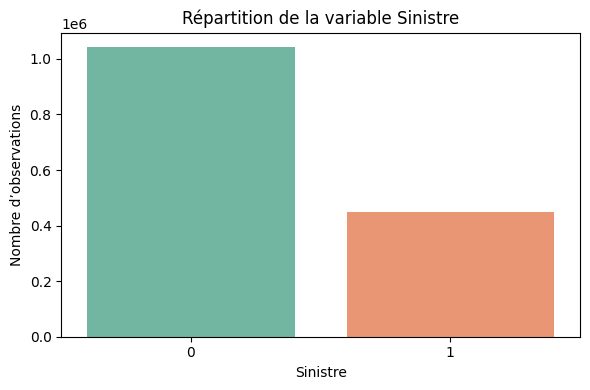

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df_freMTPL, x='Sinistre', palette='Set2')
plt.title('Répartition de la variable Sinistre')
plt.xlabel('Sinistre')
plt.ylabel('Nombre d’observations')
plt.tight_layout()
plt.show()
